# Customer Simulation

![title](customer_sim_pic.png)

A National Veterans Organization is seeking to target likely donators via direct mail in order to maximize donations. 

# Load Packages

In [1]:
import swat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import time
import gym
import gym_customersim

# Make Environment

In [2]:
env = gym.make('CustomerSim-v0')

In [3]:
# Env Actions
actions_dict = {
    "no action" : 0,
    "mailings had lables only 1" : 1,
    "mailings had lables only 2" : 2,
    "mailings are calendars with stickers but do not have labels" : 3,
    "mailings are blank cards that fold into thirds with labels" : 4,
    "mailings are blank cards with labels 1" : 5,
    "mailings are blank cards with labels 2" : 6,
    "mailings have thank you printed on the outside with labels" : 7,
    "mailings are general greeting cards (an assortment of birthday, sympathy, blank, & get well) with labels" : 8,
    "mailings are Christmas cards with labels" : 9,
    "mailings have labels and a notepad 1" : 10,
    "mailings have labels and a notepad 2" : 11
}
env.action_space

Discrete(12)

In [4]:
# Env Observation
obs = {"r0":0,"f0":1,"m0":2,"ir0":3,"if0":4,"gender":5,"age":6,"income":7,"zip_region":8}
env.observation_space

Box(0.0, 100000.0, (9,), float32)

In [5]:
# Random Marketing Actions
env.reset()
ran_sim = []
ran_sim.append(env.env.state.tolist())
actions = [-99]
rewards = [0]

for i in range(18):
    action = np.random.randint(env.action_space.n)
    actions.append(action)
    reward = env.step(action)[1]
    rewards.append(reward)
    ran_sim.append(env.env.state.tolist())

df = pd.DataFrame(ran_sim)
df.columns = ["r0","f0","m0","ir0","if0","gender","age","income","zip_region"]
df["action"] = actions
df["reward"] = rewards
df

,r0,f0,m0,ir0,if0,gender,age,income,zip_region,action,reward
0,0.0,0.0,0.0,0.0,0.0,1.0,74.0,4.0,3.0,-99,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,74.0,4.0,3.0,7,0.0
2,2.0,0.0,0.0,0.0,2.0,1.0,74.0,4.0,3.0,7,0.0
3,3.0,0.0,0.0,0.0,3.0,1.0,74.0,4.0,3.0,5,0.0
4,4.0,0.0,0.0,0.0,4.0,1.0,74.0,4.0,3.0,3,0.0
5,0.0,1.0,14.0,0.0,5.0,1.0,74.0,4.0,3.0,2,14.0
6,1.0,1.0,14.0,0.0,6.0,1.0,74.0,4.0,3.0,11,0.0
7,2.0,1.0,14.0,0.0,7.0,1.0,74.0,4.0,3.0,3,0.0
8,3.0,1.0,14.0,0.0,8.0,1.0,74.0,4.0,3.0,6,0.0
9,4.0,1.0,14.0,0.0,9.0,1.0,74.0,4.0,3.0,3,0.0


# Connect to CAS

In [6]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Create SAS RL Environment URL

In [7]:
cmd_data = subprocess.check_output(['ipconfig','/all']).decode('utf-8').split('\n')
ip_data = [item for item in cmd_data if "IPv4 Address" in item]
computer_id = ip_data[0].split(": ")[1].split("(")[0]
sasrl_env_port = "10200"
sasrl_env_url = computer_id + ":" + sasrl_env_port

# Load the RL Action Set

In [8]:
conn.loadactionset('reinforcementLearn')

NOTE: Added action set 'reinforcementLearn'.


[actionset]

 'reinforcementLearn'

+ Elapsed: 0.205s, user: 0.386s, sys: 0.726s, mem: 0.22mb

# Change timeout

In [9]:
mytime = 60*60*24*2
conn.session.timeout(time=mytime)
conn.session.sessionStatus()

[ActionStatus]

 'Action is active'

[Authenticated]

 'Yes'

[Timeout]

 172800

[locale]

 'en_US'

[number of Connections]

 1

[state]

 'Connected'

+ Elapsed: 0.000238s, sys: 0.000218s, mem: 0.203mb

# Train the Agent - Deep Q Networks

In [10]:
# results = conn.reinforcementLearn.rlTrainDqn(
    
#     # RL Arguments
#     environment=dict(type='remote', url=sasrl_env_url, name='CustomerSim-v0', render=False, seed=802),
#     exploration = dict(type="linear", initialEpsilon=0.99, minEpsilon=0.05),
#     gamma = 0.99,
#     numEpisodes = 20000,
    
#     # NN Arguments
#     QModel=[{'type':'FC', 'n':128, 'act':'RELU'},
#             {'type':'FC', 'n':128, 'act':'RELU'}],
#     optimizer=dict(method='ADAM', beta1=0.9, beta2=0.999, learningRate=0.001, miniBatchSize=128),
#     minReplayMemory = 100,
#     maxReplayMemory = 10000,
#     targetUpdateInterval = 100,
    
#     # Test Arguments
#     testInterval = 100,
#     numTestEpisodes = 5,
    
#     # Other Arguments
#     modelOut=dict(name='dqn_weights', replace=True),
#     seed = 919
    
# )

# Save the Model

In [11]:
# Add a CASlib
conn.table.addCaslib(name="mycl", path="/workshop/winsas/VOSI", dataSource="PATH", activeOnAdd=False)

NOTE: Cloud Analytic Services added the caslib 'mycl'.


,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,mycl,PATH,,/workshop/winsas/VOSI/,,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
# Save Optimization History
# pd.DataFrame(results["OptIterHistory"]).to_csv("D:/Workshop/Winsas/VOSI/customer_sim_opthist.csv", index=False)

In [13]:
# Save DQN Weights
# conn.table.save(caslib = 'mycl', table = 'dqn_weights', name = 'customer_sim_dqn_weights', replace = True)
# conn.table.attribute(caslib = 'CASUSER', table = 'customer_sim_dqn_weights_attr', name = 'dqn_weights', task='convert')
# conn.table.save(caslib = 'mycl', table = 'customer_sim_dqn_weights_attr', name = 'customer_sim_dqn_weights_attr', replace = True)

# Load the Model

In [14]:
# Load Optimization History
results = pd.read_csv("D:/Workshop/Winsas/VOSI/customer_sim_opthist.csv")

In [15]:
# Load DQN Weights
conn.table.loadTable(caslib = 'mycl', path="customer_sim_dqn_weights.sashdat", casOut=dict(name="dqn_weights", replace=True))
conn.table.loadTable(caslib = 'mycl', path="customer_sim_dqn_weights_attr.sashdat", casOut=dict(name="dqn_weights_attr", replace=True))
conn.table.attribute(caslib='CASUSER', task='ADD', name='dqn_weights', attrtable='dqn_weights_attr')

NOTE: Cloud Analytic Services made the file customer_sim_dqn_weights.sashdat available as table DQN_WEIGHTS in caslib CASUSER(student).
NOTE: Cloud Analytic Services made the file customer_sim_dqn_weights_attr.sashdat available as table DQN_WEIGHTS_ATTR in caslib CASUSER(student).


+ Elapsed: 0.000301s, user: 0.000283s, mem: 0.291mb

# View Results

In [16]:
results

,Iteration,AvgQValue,AvgTarget,AvgLoss,Test Reward
0,5,5.108339,5.547345,27.663916,89.4
1,100,79.741999,81.940786,111.176657,50.2
2,200,166.468743,158.423069,2852.182987,18.8
3,300,486.405250,486.876596,48412.566147,15.0
4,400,943.129420,989.180086,76613.971496,16.4
...,...,...,...,...,...
196,19600,453.061187,465.995224,6009.569838,61.0
197,19700,713.942348,734.398069,21871.089073,36.0
198,19800,428.628683,444.918169,8086.946422,14.8
199,19900,374.472151,344.094035,8700.912070,25.8


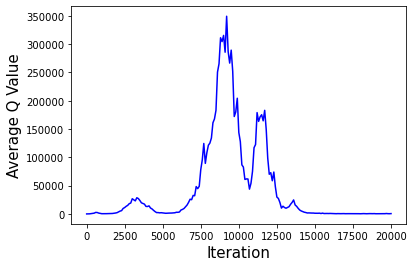

In [17]:
plt.plot(results['Iteration'],results['AvgQValue'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Q Value", fontsize=15)
plt.show()

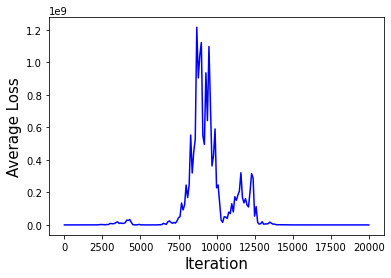

In [18]:
plt.plot(results['Iteration'],results['AvgLoss'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Loss", fontsize=15)
plt.show()

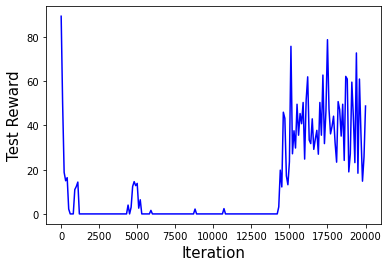

In [19]:
plt.plot(results['Iteration'],results['Test Reward'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Test Reward", fontsize=15)
plt.show()

# Score the Model

In [20]:
conn.reinforcementLearn.rlScore(
    environment=dict(type='remote', url=sasrl_env_url, name='CustomerSim-v0', 
                     render=False, seed=123),
    model='dqn_weights',
    numEpisodes=10,
    logFreq=1,
    casout=dict(name='scored_table', replace=True)
)

         Episode=        1 Step=        1 LastReward=     0 AverageReward=     0
         Episode=        1 Step=        2 LastReward=     0 AverageReward=     0
         Episode=        1 Step=        3 LastReward=     0 AverageReward=     0
         Episode=        1 Step=        4 LastReward=     0 AverageReward=     0
         Episode=        1 Step=        5 LastReward=     0 AverageReward=     0
         Episode=        1 Step=        6 LastReward=     0 AverageReward=     0
         Episode=        1 Step=        7 LastReward=     0 AverageReward=     0
         Episode=        1 Step=        8 LastReward=     0 AverageReward=    10
         Episode=        1 Step=        9 LastReward=     0 AverageReward=    10
         Episode=        1 Step=       10 LastReward=     0 AverageReward=    10
         Episode=        1 Step=       11 LastReward=     0 AverageReward=    10
         Episode=        1 Step=       12 LastReward=     0 AverageReward=    10
         Episode=        1 S

,Property,Value
0,Number of State Variables,9
1,Number of Actions,12
2,Algorithm,DQN
3,Optimizer,ADAM


# Download Final Test

In [21]:
scored_table = conn.CASTable(name = "scored_table")
df = scored_table.to_frame()
df

,_Step_,_Episode_,_State_0,_State_1,_State_2,_State_3,_State_4,_State_5,_State_6,_State_7,_State_8,_Action_,_Reward_,_Done_
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,74.0,4.0,3.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,74.0,4.0,3.0,0.0,0.0,0.0
2,2.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,74.0,4.0,3.0,0.0,0.0,0.0
3,3.0,1.0,3.0,0.0,0.0,3.0,0.0,1.0,74.0,4.0,3.0,0.0,0.0,0.0
4,4.0,1.0,4.0,0.0,0.0,4.0,0.0,1.0,74.0,4.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,13.0,10.0,5.0,1.0,10.0,0.0,3.0,1.0,58.0,3.0,4.0,0.0,0.0,0.0
176,14.0,10.0,6.0,1.0,10.0,1.0,3.0,1.0,58.0,3.0,4.0,0.0,0.0,0.0
177,15.0,10.0,7.0,1.0,10.0,2.0,3.0,1.0,58.0,3.0,4.0,0.0,0.0,0.0
178,16.0,10.0,8.0,1.0,10.0,3.0,3.0,1.0,58.0,3.0,4.0,0.0,0.0,0.0


In [22]:
vals, counts = np.unique(df["_Action_"], return_counts=True)
actions_list = list(actions_dict.keys())
act = [actions_list[int(x)] for x in list(vals)]
md = {"Action Number":vals,"Frequency":counts,"Action":act}
pd.options.display.max_colwidth = 100
pd.DataFrame(md)

,Action Number,Frequency,Action
0,0.0,107,no action
1,1.0,30,mailings had lables only 1
2,4.0,4,mailings are blank cards that fold into thirds with labels
3,6.0,13,mailings are blank cards with labels 2
4,7.0,13,mailings have thank you printed on the outside with labels
5,9.0,11,mailings are Christmas cards with labels
6,10.0,2,mailings have labels and a notepad 1


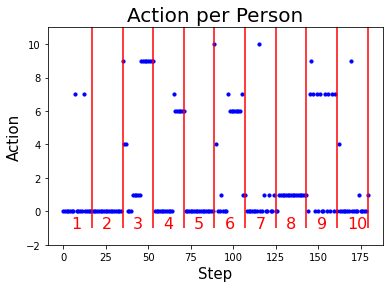

In [23]:
plt.scatter(range(df["_Action_"].shape[0]), df["_Action_"], color="blue", s=10)
plt.title("Action per Person", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Action", fontsize=15)
plt.ylim(-2,11)
my_seq = [(x*18-1) for x in range(1,11)]
for i in range(10):
    plt.vlines(my_seq[i],-1,11, color="red")
my_seq2 = [(x*18-13) for x in range(1,11)]
for i in range(10):
    plt.text(my_seq2[i],-1,str(i+1), color="red", fontsize=16)
plt.show()

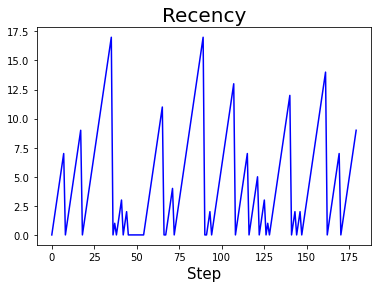

In [24]:
plt.plot(df["_State_0"], color="blue")
plt.title("Recency", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.show()

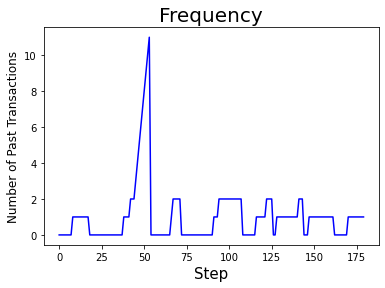

In [25]:
plt.plot(df["_State_1"], color="blue")
plt.title("Frequency", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Number of Past Transactions", fontsize=12)
plt.show()

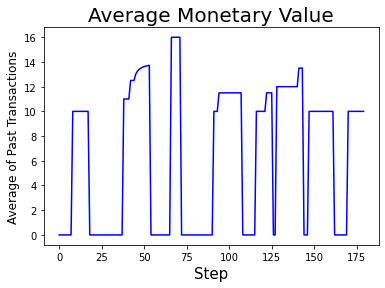

In [26]:
plt.plot(df["_State_2"], color="blue")
plt.title("Average Monetary Value", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Average of Past Transactions", fontsize=12)
plt.show()

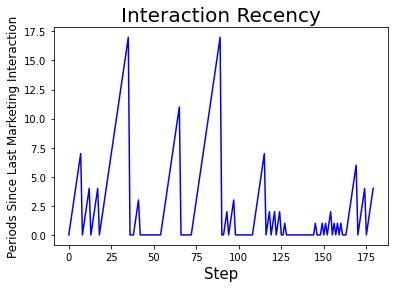

In [27]:
plt.plot(df["_State_3"], color="blue")
plt.title("Interaction Recency", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Periods Since Last Marketing Interaction", fontsize=12)
plt.show()

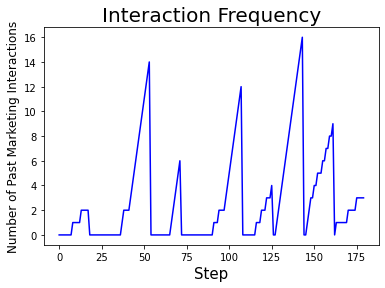

In [28]:
plt.plot(df["_State_4"], color="blue")
plt.title("Interaction Frequency", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Number of Past Marketing Interactions", fontsize=12)
plt.show()

# End the Session

In [29]:
conn.session.endSession()

+ Elapsed: 0.000328s, user: 0.000305s, mem: 0.204mb